In [65]:
library(hts)  

In [66]:
data = read.csv(file="/home/xenakas/Desktop/Git/hierarchical_modelling/grouped_ts/gdp_us_state_ind.csv", header = TRUE, sep = ",")

In [67]:
head(data)

date,AKACC,AKADM,AKAGR,AKART,AKCON,AKDUR,AKEDC,AKFIN,AKGOV,⋯,WYMNG,WYNDU,WYOTH,WYPIT,WYPRO,WYRER,WYRET,WYTRA,WYUTI,WYWHO
2005-01-01,1213,735,286,192,2465,175,132,1126,8691,⋯,125,1211,555,25008,783,2473,1683,1737,724,1088
2005-04-01,1216,772,340,194,2476,177,131,1130,8614,⋯,101,1210,543,26017,756,2707,1713,1765,702,1136
2005-07-01,1206,770,452,200,2423,173,134,1190,8534,⋯,154,1203,557,24948,752,2410,1734,1877,788,1150
2005-10-01,1215,734,607,196,2304,165,144,1162,8696,⋯,92,1287,564,25186,772,2375,1739,1900,709,1182
2006-01-01,1236,735,487,191,2280,172,137,1052,8587,⋯,105,1304,617,27168,795,2427,1783,2029,762,1243
2006-04-01,1255,746,467,197,2255,171,136,1019,8666,⋯,145,1433,637,28202,823,2481,1852,2101,834,1281


In [68]:
summary(data)

         date        AKACC          AKADM          AKAGR           AKART      
 2005-01-01: 1   Min.   :1189   Min.   : 734   Min.   :286.0   Min.   :189.0  
 2005-04-01: 1   1st Qu.:1234   1st Qu.: 876   1st Qu.:423.0   1st Qu.:209.0  
 2005-07-01: 1   Median :1260   Median : 984   Median :482.0   Median :241.0  
 2005-10-01: 1   Mean   :1263   Mean   : 952   Mean   :482.6   Mean   :232.1  
 2006-01-01: 1   3rd Qu.:1287   3rd Qu.:1039   3rd Qu.:515.0   3rd Qu.:254.0  
 2006-04-01: 1   Max.   :1402   Max.   :1089   Max.   :691.0   Max.   :271.0  
 (Other)   :47                                                                
     AKCON          AKDUR           AKEDC           AKFIN          AKGOV     
 Min.   :1582   Min.   :155.0   Min.   :109.0   Min.   : 764   Min.   :8534  
 1st Qu.:1897   1st Qu.:171.5   1st Qu.:116.0   1st Qu.: 946   1st Qu.:8754  
 Median :2102   Median :181.0   Median :125.0   Median : 990   Median :9143  
 Mean   :2045   Mean   :179.8   Mean   :123.4   Mean   :

In [69]:
dim(data)

[1]   53 1173

In [70]:
data[rowSums(is.na(data)) > 0,]

,date,AKACC,AKADM,AKAGR,AKART,AKCON,AKDUR,AKEDC,AKFIN,AKGOV,⋯,WYMNG,WYNDU,WYOTH,WYPIT,WYPRO,WYRER,WYRET,WYTRA,WYUTI,WYWHO
1,2005-01-01,1213,735,286,192,2465,175,132,1126,8691,⋯,125,1211,555,25008,783,2473,1683,1737,724,1088
2,2005-04-01,1216,772,340,194,2476,177,131,1130,8614,⋯,101,1210,543,26017,756,2707,1713,1765,702,1136
3,2005-07-01,1206,770,452,200,2423,173,134,1190,8534,⋯,154,1203,557,24948,752,2410,1734,1877,788,1150
4,2005-10-01,1215,734,607,196,2304,165,144,1162,8696,⋯,92,1287,564,25186,772,2375,1739,1900,709,1182
13,2008-01-01,1359,857,373,209,2145,198,125,1028,8614,⋯,110,2196,673,31406,964,2831,2044,2335,790,1533
14,2008-04-01,1402,876,366,212,2126,194,125,1028,8716,⋯,131,2437,642,31902,993,2954,2021,2418,850,1519
15,2008-07-01,1380,892,423,215,2178,189,129,993,8787,⋯,104,2212,662,32619,1013,3106,2026,2429,885,1514
16,2008-10-01,1306,911,576,209,2078,194,129,892,8767,⋯,112,1968,663,35102,1004,3290,2004,2258,821,1473
17,2009-01-01,1294,935,498,203,2112,181,127,1084,8989,⋯,108,1458,656,35033,989,3466,2006,2185,758,1364
18,2009-04-01,1219,934,505,213,2221,182,123,1105,9063,⋯,106,1269,646,32196,910,3206,1990,2134,809,1287


In [71]:
data = data[1:51, ]
dim(data)

[1]   51 1173

In [72]:
rownames(data) = as.Date(data[,1])
#rownames(data)
data$date <- NULL
#colnames(data)

In [73]:
y = hts(data, characters = c(2,3))

s = smatrix(y)

In [74]:
head(s)

1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


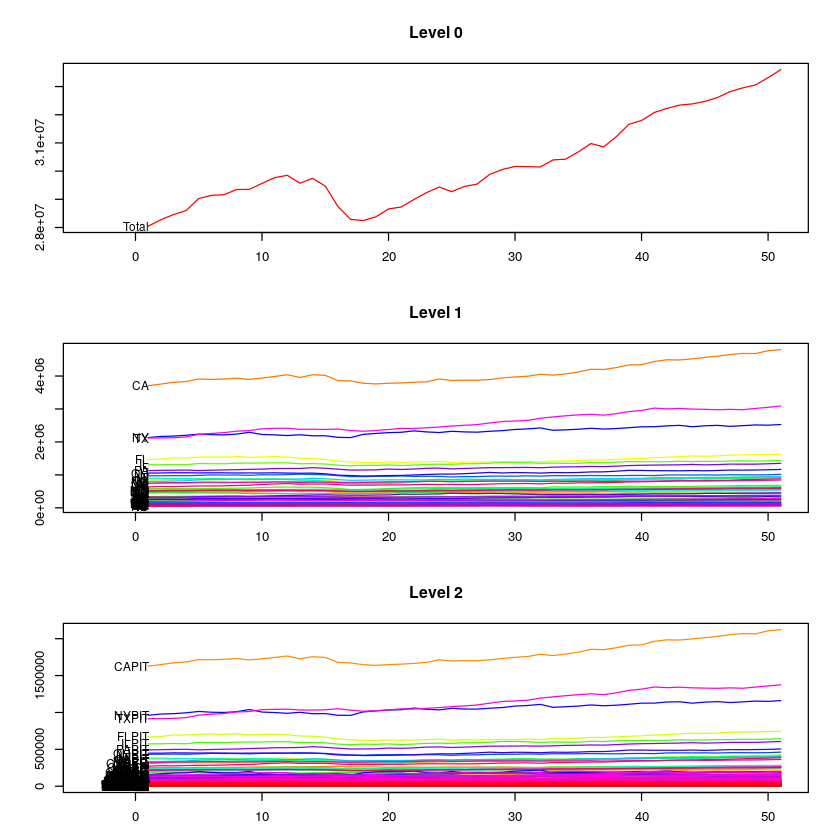

In [75]:
plot(y, levels = c(0, 1, 2))

Warning message in ets(x, lambda = lambda, ...):
“Missing values encountered. Using longest contiguous portion of time series”Warning message in ets(x, lambda = lambda, ...):
“Missing values encountered. Using longest contiguous portion of time series”Warning message in ets(x, lambda = lambda, ...):
“Missing values encountered. Using longest contiguous portion of time series”Warning message in ets(x, lambda = lambda, ...):
“Missing values encountered. Using longest contiguous portion of time series”Warning message in ets(x, lambda = lambda, ...):
“Missing values encountered. Using longest contiguous portion of time series”Warning message in ets(x, lambda = lambda, ...):
“Missing values encountered. Using longest contiguous portion of time series”Warning message in ets(x, lambda = lambda, ...):
“Missing values encountered. Using longest contiguous portion of time series”Warning message in ets(x, lambda = lambda, ...):
“Missing values encountered. Using longest contiguous portion of time

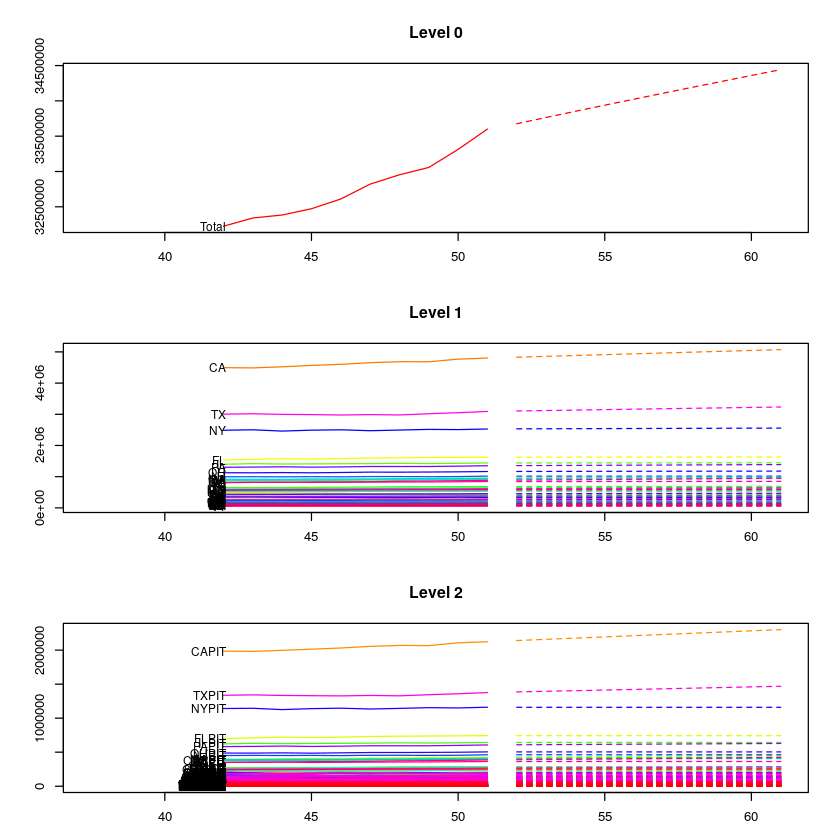

In [43]:
gdpforecast <- forecast(y, h=10, method="bu")

plot(gdpforecast, include=10)

In [85]:
allts <- aggts(y)
allf <- matrix(, nrow=5, ncol=ncol(allts))

In [86]:
head(allts)

Total,AK,AL,AR,AZ,CA,CO,CT,DC,DE,⋯,WYMNG,WYNDU,WYOTH,WYPIT,WYPRO,WYRER,WYRET,WYTRA,WYUTI,WYWHO
28045541,74678,338951,201600,473075,3706848,460919,474144,151315,108678,⋯,125,1211,555,25008,783,2473,1683,1737,724,1088
28274364,75747,343847,203372,482975,3756008,461716,477180,151631,106151,⋯,101,1210,543,26017,756,2707,1713,1765,702,1136
28457821,75672,343205,204295,493773,3809229,465512,472322,151105,106607,⋯,154,1203,557,24948,752,2410,1734,1877,788,1150
28600684,76418,346822,208890,498074,3832674,460844,476099,151463,119609,⋯,92,1287,564,25186,772,2375,1739,1900,709,1182
29026167,78071,348558,208064,509069,3910200,472427,493448,154133,115015,⋯,105,1304,617,27168,795,2427,1783,2029,762,1243
29142664,80142,350209,210889,512004,3898165,469898,490618,154562,117504,⋯,145,1433,637,28202,823,2481,1852,2101,834,1281


In [87]:
allf

NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [88]:
# Select preferred time-series forecasting method for each time series

for(i in 1:ncol(allts))
  allf[,i] <- forecast(auto.arima(allts[,i]), h=5)$mean
allf <- ts(allf)

# combine the forecasts with the group matrix to get a gts object
g <- get_nodes(y)
y.f <- combinef(allf, nodes = g)

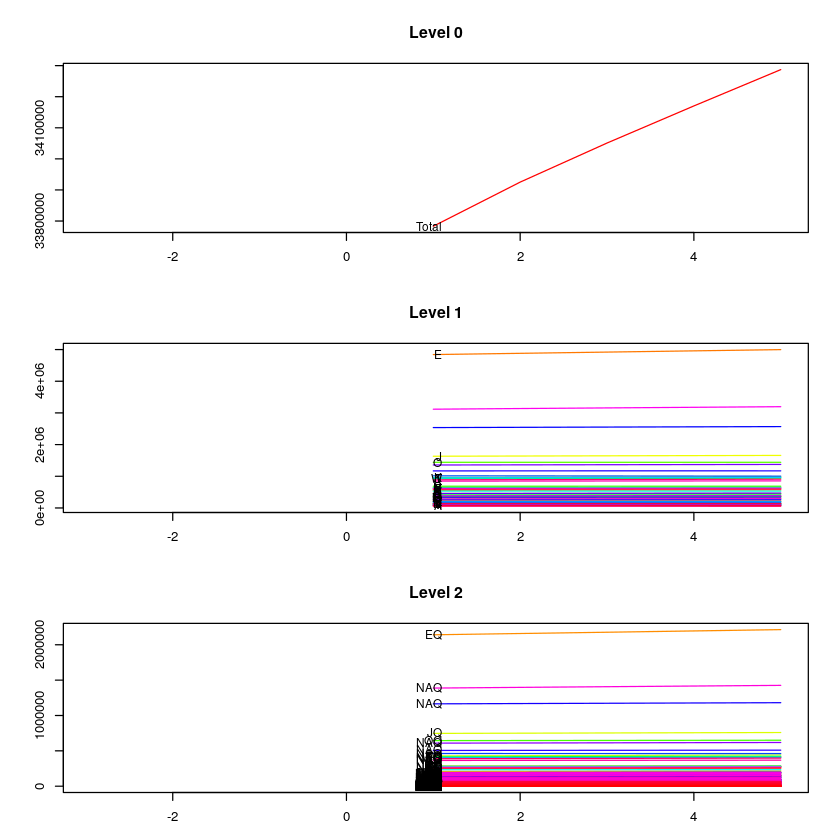

In [89]:
plot(y.f)

In [90]:
tail(data)

,AKACC,AKADM,AKAGR,AKART,AKCON,AKDUR,AKEDC,AKFIN,AKGOV,AKHLT,⋯,WYMNG,WYNDU,WYOTH,WYPIT,WYPRO,WYRER,WYRET,WYTRA,WYUTI,WYWHO
2016-04-01,1285,984,458,251,1763,165,110,800,9207,3225,⋯,123,1833,524,29274,920,3713,2053,2357,895,1483
2016-07-01,1287,972,482,247,1758,155,114,803,9013,3301,⋯,119,1822,492,28910,905,3854,1994,2368,941,1410
2016-10-01,1250,970,490,254,1671,155,109,862,9052,3322,⋯,122,1786,496,28901,921,3925,2004,2372,929,1397
2017-01-01,1254,962,423,249,1582,158,118,764,9258,3303,⋯,120,1923,500,29131,937,3760,1997,2379,901,1410
2017-04-01,1257,956,421,267,1591,159,114,824,9305,3345,⋯,116,1947,501,30554,941,4033,2033,2426,971,1470
2017-07-01,1292,970,468,259,1593,161,115,789,9288,3394,⋯,113,1928,510,30456,942,4093,2054,2388,778,1517


In [94]:
colnames(data)

[1] "AKACC" "AKADM" "AKAGR" "AKART" "AKCON" "AKDUR" "AKEDC" "AKFIN" "AKGOV"
  [10] "AKHLT" "AKINF" "AKMAN" "AKMIN" "AKMNG" "AKNDU" "AKOTH" "AKPIT" "AKPRO"
  [19] "AKRER" "AKRET" "AKTRA" "AKUTI" "AKWHO" "ALACC" "ALADM" "ALAGR" "ALART"
  [28] "ALCON" "ALDUR" "ALEDC" "ALFIN" "ALGOV" "ALHLT" "ALINF" "ALMAN" "ALMIN"
  [37] "ALMNG" "ALNDU" "ALOTH" "ALPIT" "ALPRO" "ALRER" "ALRET" "ALTRA" "ALUTI"
  [46] "ALWHO" "ARACC" "ARADM" "ARAGR" "ARART" "ARCON" "ARDUR" "AREDC" "ARFIN"
  [55] "ARGOV" "ARHLT" "ARINF" "ARMAN" "ARMIN" "ARMNG" "ARNDU" "AROTH" "ARPIT"
  [64] "ARPRO" "ARRER" "ARRET" "ARTRA" "ARUTI" "ARWHO" "AZACC" "AZADM" "AZAGR"
  [73] "AZART" "AZCON" "AZDUR" "AZEDC" "AZFIN" "AZGOV" "AZHLT" "AZINF" "AZMAN"
  [82] "AZMIN" "AZMNG" "AZNDU" "AZOTH" "AZPIT" "AZPRO" "AZRER" "AZRET" "AZTRA"
  [91] "AZUTI" "AZWHO" "CAACC" "CAADM" "CAAGR" "CAART" "CACON" "CADUR" "CAEDC"
 [100] "CAFIN" "CAGOV" "CAHLT" "CAINF" "CAMAN" "CAMIN" "CAMNG" "CANDU" "CAOTH"
 [109] "CAPIT" "CAPRO" "CARER" "CARET" "CATRA" "CAUTI" "CAWHO" "COACC" "COADM"
 [118] "COAGR" "COART" "COCON" "CODUR" "COEDC" "COFIN" "COGOV" "COHLT" "COINF"
 [127] "COMAN" "COMIN" "COMNG" "CONDU" "COOTH" "COPIT" "COPRO" "CORER" "CORET"
 [136] "COTRA" "COUTI" "COWHO" "CTACC" "CTADM" "CTAGR" "CTART" "CTCON" "CTDUR"
 [145] "CTEDC" "CTFIN" "CTGOV" "CTHLT" "CTINF" "CTMAN" "CTMIN" "CTMNG" "CTNDU"
 [154] "CTOTH" "CTPIT" "CTPRO" "CTRER" "CTRET" "CTTRA" "CTUTI" "CTWHO" "DCACC"
 [163] "DCADM" "DCAGR" "DCART" "DCCON" "DCDUR" "DCEDC" "DCFIN" "DCGOV" "DCHLT"
 [172] "DCINF" "DCMAN" "DCMIN" "DCMNG" "DCNDU" "DCOTH" "DCPIT" "DCPRO" "DCRER"
 [181] "DCRET" "DCTRA" "DCUTI" "DCWHO" "DEACC" "DEADM" "DEAGR" "DEART" "DECON"
 [190] "DEDUR" "DEEDC" "DEFIN" "DEGOV" "DEHLT" "DEINF" "DEMAN" "DEMIN" "DEMNG"
 [199] "DENDU" "DEOTH" "DEPIT" "DEPRO" "DERER" "DERET" "DETRA" "DEUTI" "DEWHO"
 [208] "FLACC" "FLADM" "FLAGR" "FLART" "FLCON" "FLDUR" "FLEDC" "FLFIN" "FLGOV"
 [217] "FLHLT" "FLINF" "FLMAN" "FLMIN" "FLMNG" "FLNDU" "FLOTH" "FLPIT" "FLPRO"
 [226] "FLRER" "FLRET" "FLTRA" "FLUTI" "FLWHO" "GAACC" "GAADM" "GAAGR" "GAART"
 [235] "GACON" "GADUR" "GAEDC" "GAFIN" "GAGOV" "GAHLT" "GAINF" "GAMAN" "GAMIN"
 [244] "GAMNG" "GANDU" "GAOTH" "GAPIT" "GAPRO" "GARER" "GARET" "GATRA" "GAUTI"
 [253] "GAWHO" "HIACC" "HIADM" "HIAGR" "HIART" "HICON" "HIDUR" "HIEDC" "HIFIN"
 [262] "HIGOV" "HIHLT" "HIINF" "HIMAN" "HIMIN" "HIMNG" "HINDU" "HIOTH" "HIPIT"
 [271] "HIPRO" "HIRER" "HIRET" "HITRA" "HIUTI" "HIWHO" "IAACC" "IAADM" "IAAGR"
 [280] "IAART" "IACON" "IADUR" "IAEDC" "IAFIN" "IAGOV" "IAHLT" "IAINF" "IAMAN"
 [289] "IAMIN" "IAMNG" "IANDU" "IAOTH" "IAPIT" "IAPRO" "IARER" "IARET" "IATRA"
 [298] "IAUTI" "IAWHO" "IDACC" "IDADM" "IDAGR" "IDART" "IDCON" "IDDUR" "IDEDC"
 [307] "IDFIN" "IDGOV" "IDHLT" "IDINF" "IDMAN" "IDMIN" "IDMNG" "IDNDU" "IDOTH"
 [316] "IDPIT" "IDPRO" "IDRER" "IDRET" "IDTRA" "IDUTI" "IDWHO" "ILACC" "ILADM"
 [325] "ILAGR" "ILART" "ILCON" "ILDUR" "ILEDC" "ILFIN" "ILGOV" "ILHLT" "ILINF"
 [334] "ILMAN" "ILMIN" "ILMNG" "ILNDU" "ILOTH" "ILPIT" "ILPRO" "ILRER" "ILRET"
 [343] "ILTRA" "ILUTI" "ILWHO" "INACC" "INADM" "INAGR" "INART" "INCON" "INDUR"
 [352] "INEDC" "INFIN" "INGOV" "INHLT" "ININF" "INMAN" "INMIN" "INMNG" "INNDU"
 [361] "INOTH" "INPIT" "INPRO" "INRER" "INRET" "INTRA" "INUTI" "INWHO" "KSACC"
 [370] "KSADM" "KSAGR" "KSART" "KSCON" "KSDUR" "KSEDC" "KSFIN" "KSGOV" "KSHLT"
 [379] "KSINF" "KSMAN" "KSMIN" "KSMNG" "KSNDU" "KSOTH" "KSPIT" "KSPRO" "KSRER"
 [388] "KSRET" "KSTRA" "KSUTI" "KSWHO" "KYACC" "KYADM" "KYAGR" "KYART" "KYCON"
 [397] "KYDUR" "KYEDC" "KYFIN" "KYGOV" "KYHLT" "KYINF" "KYMAN" "KYMIN" "KYMNG"
 [406] "KYNDU" "KYOTH" "KYPIT" "KYPRO" "KYRER" "KYRET" "KYTRA" "KYUTI" "KYWHO"
 [415] "LAACC" "LAADM" "LAAGR" "LAART" "LACON" "LADUR" "LAEDC" "LAFIN" "LAGOV"
 [424] "LAHLT" "LAINF" "LAMAN" "LAMIN" "LAMNG" "LANDU" "LAOTH" "LAPIT" "LAPRO"
 [433] "LARER" "LARET" "LATRA" "LAUTI" "LAWHO" "MAACC" "MAADM" "MAAGR" "MAART"
 [442] "MACON" "MADUR" "MAEDC" "MAFIN" "MAGOV" "MAHLT" "MAINF" "MAMAN" "MAMIN"
 [451] "MAMNG" "MANDU" "MAOTH" "MAPIT" "MAPRO" "MARER

In [103]:
forecasts_5 = y.f[[1]][,]

In [104]:
colnames(forecasts_5) = colnames(data)

In [105]:
forecasts_5

AKACC,AKADM,AKAGR,AKART,AKCON,AKDUR,AKEDC,AKFIN,AKGOV,AKHLT,⋯,WYMNG,WYNDU,WYOTH,WYPIT,WYPRO,WYRER,WYRET,WYTRA,WYUTI,WYWHO
1309.114,990.6755,492.0941,287.0686,1599.654,188.2001,138.9058,813.0941,9312.094,3441.114,⋯,168.1707,1877.158,556.0108,30390.52,988.0108,4115.567,2100.011,2434.011,919.4470,1563.011
1300.539,984.0939,488.9310,284.5645,1579.051,187.5777,135.7427,809.9310,9308.931,3460.971,⋯,183.5815,1752.175,567.8041,30298.60,999.8041,4158.552,2111.804,2445.804,931.2402,1574.804
1288.384,972.7145,480.9702,278.1807,1553.650,181.6953,127.7819,801.9702,9300.970,3476.030,⋯,184.3334,1644.142,567.1272,30206.81,999.1272,4189.066,2111.127,2445.127,930.5634,1574.127
1272.563,956.7271,468.4013,266.9347,1523.641,170.8267,115.2130,789.4013,9288.401,3486.481,⋯,174.4163,1558.049,556.6459,30117.80,988.6459,4209.776,2100.646,2434.646,920.0820,1563.646
1258.234,941.5005,456.5932,256.5199,1494.393,160.4094,103.4049,777.5932,9276.593,3497.693,⋯,162.0412,1497.728,544.0479,30037.97,976.0479,4228.369,2088.048,2422.048,907.4841,1551.048


In [106]:
data_f5 = rbind(data,forecasts_5)

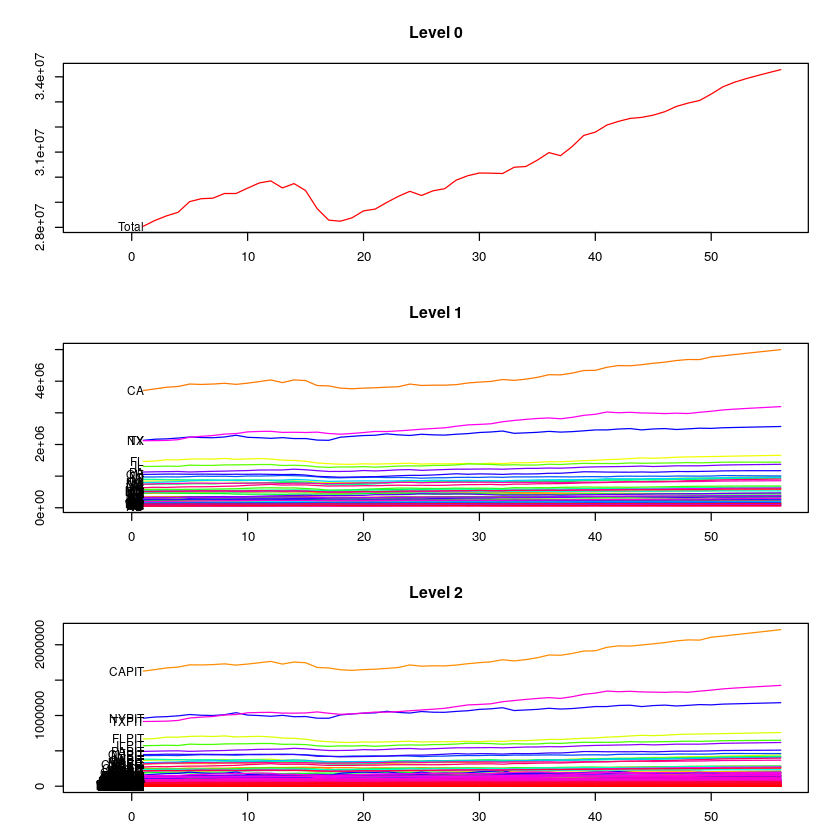

In [107]:
y_f5 = hts(data_f5, characters = c(2,3))

plot(y_f5, levels = c(0, 1, 2))

h = 10

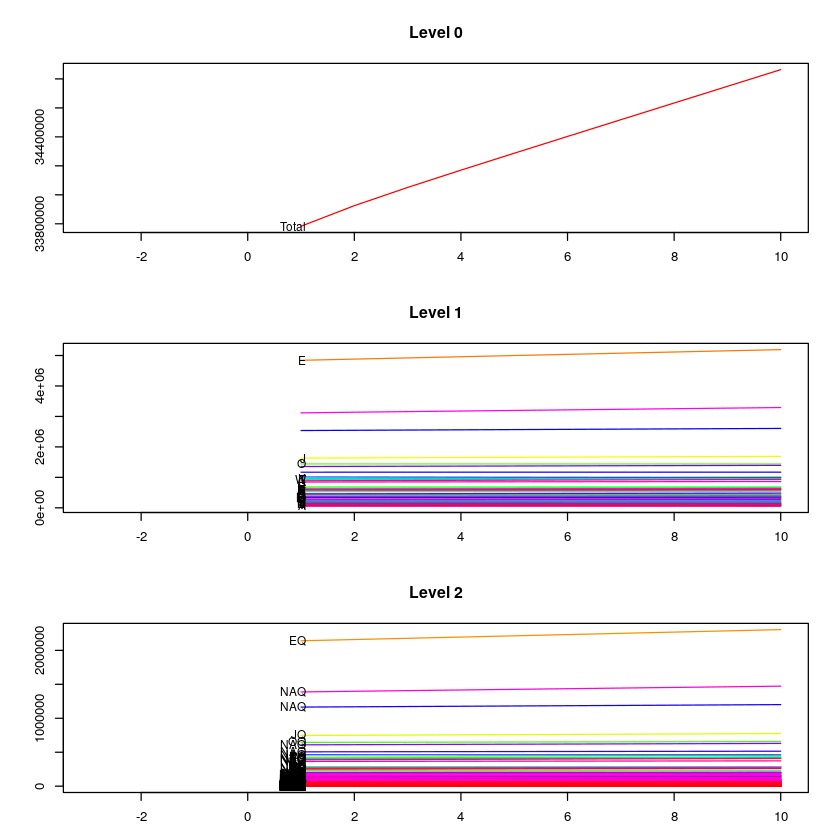

In [51]:
plot(y.f)


In [59]:
dim(y.f[[1]])

[1]   10 1172

In [62]:
tail(data)

,AKACC,AKADM,AKAGR,AKART,AKCON,AKDUR,AKEDC,AKFIN,AKGOV,AKHLT,⋯,WYMNG,WYNDU,WYOTH,WYPIT,WYPRO,WYRER,WYRET,WYTRA,WYUTI,WYWHO
2016-04-01,1285,984,458,251,1763,165,110,800,9207,3225,⋯,123,1833,524,29274,920,3713,2053,2357,895,1483
2016-07-01,1287,972,482,247,1758,155,114,803,9013,3301,⋯,119,1822,492,28910,905,3854,1994,2368,941,1410
2016-10-01,1250,970,490,254,1671,155,109,862,9052,3322,⋯,122,1786,496,28901,921,3925,2004,2372,929,1397
2017-01-01,1254,962,423,249,1582,158,118,764,9258,3303,⋯,120,1923,500,29131,937,3760,1997,2379,901,1410
2017-04-01,1257,956,421,267,1591,159,114,824,9305,3345,⋯,116,1947,501,30554,941,4033,2033,2426,971,1470
2017-07-01,1292,970,468,259,1593,161,115,789,9288,3394,⋯,113,1928,510,30456,942,4093,2054,2388,778,1517


In [63]:
y.f[[1]]

AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,⋯,NAN,NAO,NAP,NAQ,NAR,NAS,NAT,NAU,NAV,NAW
1309.114,990.6755,492.0941,287.0686,1599.654,188.2001,138.90576,813.0941,9312.094,3441.114,⋯,168.17065,1877.158,556.0108,30390.52,988.0108,4115.567,2100.011,2434.011,919.4470,1563.011
1300.539,984.0939,488.9310,284.5645,1579.051,187.5777,135.74266,809.9310,9308.931,3460.971,⋯,183.58147,1752.175,567.8041,30298.60,999.8041,4158.552,2111.804,2445.804,931.2402,1574.804
1288.384,972.7145,480.9702,278.1807,1553.650,181.6953,127.78185,801.9702,9300.970,3476.030,⋯,184.33336,1644.142,567.1272,30206.81,999.1272,4189.066,2111.127,2445.127,930.5634,1574.127
1272.563,956.7271,468.4013,266.9347,1523.641,170.8267,115.21297,789.4013,9288.401,3486.481,⋯,174.41628,1558.049,556.6459,30117.80,988.6459,4209.776,2100.646,2434.646,920.0820,1563.646
1258.234,941.5005,456.5932,256.5199,1494.393,160.4094,103.40490,777.5932,9276.593,3497.693,⋯,162.04117,1497.728,544.0479,30037.97,976.0479,4228.369,2088.048,2422.048,907.4841,1551.048
1243.615,925.4170,443.9283,245.2287,1464.288,148.8822,90.74001,764.9283,9263.928,3508.048,⋯,147.25031,1456.667,529.1690,29965.68,961.1690,4244.681,2073.169,2407.169,892.6052,1536.169
1230.355,910.2529,432.1828,234.8623,1435.103,138.0674,78.99447,753.1828,9252.183,3519.323,⋯,132.94381,1431.092,514.8278,29902.35,946.8278,4261.531,2058.828,2392.828,878.2639,1521.828
1216.891,894.5444,419.8928,223.9500,1405.373,126.5387,66.70451,740.8928,9239.893,3530.053,⋯,118.23200,1414.410,500.1022,29845.83,932.1022,4277.997,2044.102,2378.102,863.5384,1507.102
1204.154,879.2987,408.0657,213.5010,1376.106,115.3344,54.87740,729.0657,9228.066,3541.246,⋯,104.34914,1403.528,486.2140,29796.30,918.2140,4295.300,2030.214,2364.214,849.6501,1493.214
1191.175,863.6074,395.7929,202.6061,1346.393,103.5711,42.60461,716.7929,9215.793,3551.993,⋯,90.37995,1394.577,472.2426,29751.93,904.2426,4312.520,2016.243,2350.243,835.6788,1479.243
